In [3]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control

# IDENTIFICACION DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Unidad 1 - Introducción y Conceptos Básicos  

## Modelos matemáticos sistemas LTI  

* Dominio del Tiempo (Ecuaciones diferenciales)
* Dominio Frecuencia (Función de transferencia)
* Modelo en espacio de estados

El modelamiento matemático con base al comportamiento de las variables físicas, permite la obtención de una herramienta de modelamiento siempre y cuando se conozca la información sobre las entradas y salidas del sistema así como de la estructura interna y funcionamiento de la planta a modelar.  

### **Ejemplo Paso Altos Orden 1**  

![Integrador_O1](figuras/integrador.png)

La señal de respuesta obtenida al simular el circuito es la siguiente:

![Salida_Integrador_O1](figuras/00_integrador_salida.png)

Puede observar la simulación en Multisim - Live en el siguiente enlace:

[Simulación del Filtro Paso Alto O1](https://www.multisim.com/content/cJbYayursNg37p2B3eZUs5/filtro_high/open)

## Función de transferencia del filtro paso alto de orden 1:

Para entender la respuesta obtenida en la simulación es necesario analizar y tratar de obtener una función de transferencia a partir de las leyes físicas y de circuitos conocidas, a continuación el procedimiento empleado:

La impedancia del capacitor está dada por:

\begin{equation}
Z_C = \frac{1}{sC}
\end{equation}  

Por tanto la corriente de entrada sería:

\begin{equation}
I(s) = \frac{V_i}{Z_C+R_1}
\end{equation}  

Calculando el voltaje en la entrada NO Inversora mediante un divisor de tensión:

\begin{equation}
V_1 = I(s)R_1 = \frac{V_iR_1}{Z_C+R_1}
\end{equation}  

Recordando que en el AO $V_1 = V_2$ y analizando por nodos en 2 y teniendo en cuenta que $V_0$ es el voltaje en la resistencia de carga o el voltaje de salida.

\begin{equation}
\frac{V_2}{R_3}+\frac{V_2 - V_0}{R_2} = 0
\end{equation}  

\begin{equation}
\frac{V_2}{R_3}+\frac{V_2}{R_2} =  \frac{V_0}{R_2}
\end{equation}  

\begin{equation}
V_2\frac{R_3+R_2}{R_3} =  V_0
\end{equation}  

Tomando en cuenta que $V_1 = V2$ entonces sustituimos la expresión $V_1$ en la anterior y obtenemos:

\begin{equation}
\left(\frac{R_3+R_2}{R_3}\right)\frac{V_iR_1}{Z_C+R_1} =  V_0
\end{equation}  

Despejando $\frac{V_0}{V_i}$ tenemos:

\begin{equation}
\left(\frac{R_3+R_2}{R_3}\right)\frac{R_1}{Z_C+R_1} =  \frac{V_0}{V_i}
\end{equation}  

Reemplazando la impedancia del capacitor obtenemos la deseada función de transferencia:

\begin{equation}
\frac{V_0}{V_i} = G(s) = \left(\frac{R_3+R_2}{R_3}\right)\frac{R_1Cs}{1+R_1Cs}
\end{equation}  

Asumiendo parámetros con valores numéricos podemos simular el modelo obtenido (R1, R2, R3, C)

In [41]:
s = sym.symbols('s', complex=True)

R1 = 1000;
R2 = 1000;
R3 = 1000;
C1 = 0.000001;


## Ganancia del filtro
Ke = (R2+R3)/R3

Gs = Ke*C1*R1*s/(C1*R1*s+1)

Gs

Creando la función de transferencia en la libreria control:

In [42]:
num = [C1*R1, 0]
den = [C1*R1, 1]

G = control.tf(num,den)
G = Ke*G
G

TransferFunction(array([0.002, 0.   ]), array([0.001, 1.   ]))

Se evalúa la respuesta al escalón de 5V del sistema y graficando $V_0$

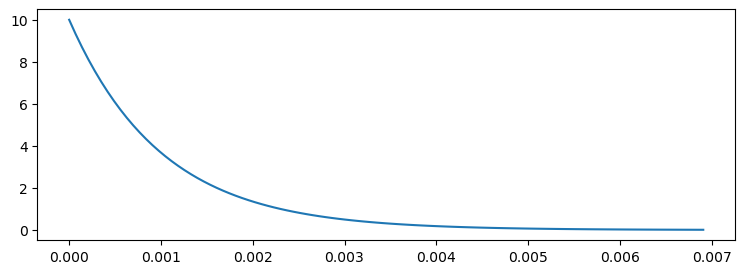

In [43]:
## Amplitud del escalon K
K = 5

t,y = control.step_response(K*G)
plt.plot(t,y)

## Ecuación diferencial del filtro paso alto de orden 1:

En el dominio del tiempo el análisis es aún más complejo matemáticamente hablando, para empezar se puede decir que la corriente de entrada depende totalmente del voltaje del capacitor.

Corriente de entrada:

\begin{equation}
i(t) = C_1\frac{dv_C}{dt}
\end{equation}  

Por tanto el voltaje $v_1$ en la entrada No inversora:

\begin{equation}
v_1 = R_1C_1\frac{dv_C}{dt}
\end{equation}  

Recordando que en el AO $v_1 = v_2$ y analizando por nodos en 2 y teniendo en cuenta que $v_0$ es el voltaje en la resistencia de carga o el voltaje de salida.

\begin{equation}
\frac{v_2}{R_3}+\frac{v_2 - v_0}{R_2} = 0
\end{equation}  

\begin{equation}
\frac{v_2}{R_3}+\frac{v_2}{R_2} =  \frac{v_0}{R_2}
\end{equation}  

\begin{equation}
v_2\frac{R_3+R_2}{R_3} =  v_0
\end{equation}  

Definiendo $K_e = \frac{R_3+R_2}{R_3}$ se tiene entonces que:

\begin{equation}
  v_0 = K_ev_2
\end{equation}  

Tomando en cuenta que $v_C = v_i-v_1$ entonces sustituimos en la expresión de $v_1$ en la anterior y obtenemos:

\begin{equation}
v_1 = R_1C_1\frac{d(v_i - v_1)}{dt}
\end{equation} 

Recordando que $v_1 = v_2$ y que  $v_0 = K_ev_2$ entonces se obtiene:

\begin{equation}
\frac{v_0}{K_e} = R_1C_1\left(\frac{dv_i}{dt} - \frac{1}{K_e}\frac{dv_0}{dt}\right)
\end{equation} 

Tomando en cuenta que la entrada es un escalón constante (exitación inicial) entonces la ecuación diferencial sería:

\begin{equation}
\frac{v_0}{K_e} + \frac{R_1C_1}{K_e}\frac{dv_0}{dt} = 0
\end{equation} 

\begin{equation}
v_0 + R_1C_1\frac{dv_0}{dt} = 0
\end{equation} 


In [39]:
##Declaramos la ecuación diferencial:

t, R1, R2, R3 , C1 = sym.symbols('t R1 R2 R3 C1', real=True)
v0 = sym.Function('v0')(t)


ode = sym.Eq(R1*C1*v0.diff(t)+v0,0)
ode 

In [40]:
sol = sym.dsolve(ode)
sol